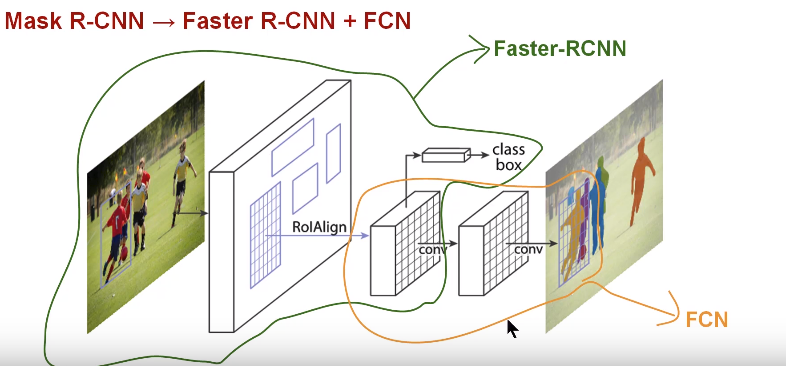

### **Mask R-CNN: A Comprehensive Explanation**

**Mask R-CNN** is an advanced deep learning model designed for **instance segmentation**. It not only detects objects in an image (like Faster R-CNN) but also generates pixel-level masks for each object, making it suitable for tasks requiring high-precision segmentation.

Let’s break it down step-by-step to understand how it works.

---

### **What is Mask R-CNN?**

Mask R-CNN builds on **Faster R-CNN**, a popular object detection architecture, and extends it by adding a branch for predicting segmentation masks at the pixel level. This means it performs three tasks simultaneously:

1. **Object Detection:** Identifies objects in the image and draws bounding boxes around them.
2. **Classification:** Classifies each detected object (e.g., cat, car, person).
3. **Instance Segmentation:** Generates a binary mask for each detected object, identifying the precise pixels belonging to the object.

---

### **Key Components of Mask R-CNN**

1. **Backbone (Feature Extraction):**
   - The backbone (e.g., ResNet or ResNeXt) extracts feature maps from the input image.
   - These feature maps represent important information about the image while reducing its spatial resolution.

2. **Region Proposal Network (RPN):**
   - The RPN generates **Region of Interest (RoI)** proposals, which are potential areas where objects might exist.
   - Each RoI is represented as a rectangular bounding box.

3. **ROI Pooling (Aligned RoI Pooling in Mask R-CNN):**
   - The RoIs are resized to a fixed size for consistent processing.
   - Unlike Faster R-CNN, Mask R-CNN uses **RoIAlign** instead of **RoIPool**, which improves precision by avoiding misalignment caused by quantization.

4. **Bounding Box and Classification Head:**
   - A branch of the network predicts the **bounding box coordinates** and **class label** for each RoI.

5. **Mask Head:**
   - A separate branch generates a pixel-wise **binary mask** for each RoI.
   - This mask is a grid of probabilities (e.g., 28x28), indicating whether each pixel in the region belongs to the object.

---

### **How Mask R-CNN Works: Step-by-Step**

#### **1. Input Image**
   - The input image is passed through the backbone (e.g., ResNet) to extract feature maps.

#### **2. Region Proposal Network (RPN)**
   - The RPN scans the feature maps and proposes regions (RoIs) that are likely to contain objects.
   - Each RoI is scored based on objectness (the likelihood of containing an object).

#### **3. RoIAlign**
   - Each proposed RoI is extracted from the feature maps and resized to a fixed size (e.g., 7x7) using **RoIAlign**.
   - RoIAlign ensures pixel-level alignment, which is crucial for accurate mask generation.

#### **4. Multi-Task Heads**
   - The feature maps for each RoI are processed by separate heads:
     1. **Bounding Box Regression:** Predicts refined bounding box coordinates.
     2. **Classification:** Predicts the class label for the object.
     3. **Mask Prediction:** Predicts a binary mask for the object using a **fully convolutional network (FCN)**.

#### **5. Output**
   - The final output includes:
     - Bounding boxes around each detected object.
     - Class labels for each detected object.
     - Binary masks for each object, indicating the exact pixels belonging to it.

---

### **Key Innovations in Mask R-CNN**

1. **RoIAlign:**
   - Faster R-CNN used RoIPool, which quantized RoI coordinates, leading to slight misalignments.
   - Mask R-CNN introduces **RoIAlign**, which eliminates quantization by using bilinear interpolation, improving mask accuracy.

2. **Mask Branch:**
   - A separate **fully convolutional network (FCN)** branch is added to predict pixel-level masks.
   - This branch operates in parallel with the bounding box and classification heads.

3. **Multi-Task Learning:**
   - Mask R-CNN optimizes for object detection, classification, and segmentation in a single framework.

---

### **Loss Function**

Mask R-CNN uses a combination of three loss functions:

1. **Classification Loss:** Cross-entropy loss for class prediction.
2. **Bounding Box Loss:** Smooth L1 loss for bounding box regression.
3. **Mask Loss:** Binary cross-entropy loss applied to the predicted mask and the ground truth mask, but only for the region inside the bounding box.

---

### **Applications of Mask R-CNN**

1. **Instance Segmentation:**  
   - Used in applications like autonomous driving (detecting and segmenting pedestrians, cars), medical imaging (segmenting organs or tumors), and video processing.
   
2. **Augmented Reality:**  
   - Identifying and isolating objects for AR applications.
   
3. **Image Editing:**  
   - Segmenting objects for removal or manipulation in photos.

4. **Precision Agriculture:**  
   - Identifying and segmenting crops or weeds in aerial imagery.

---

### **Strengths of Mask R-CNN**

1. **High Accuracy:**  
   - Combines precise bounding box detection with pixel-level segmentation.

2. **Versatility:**  
   - Can handle multiple tasks (detection, classification, segmentation) in one framework.

3. **Modularity:**  
   - Easy to replace or improve components like the backbone (e.g., ResNet, ResNeXt).

---

### **Weaknesses of Mask R-CNN**

1. **Computationally Intensive:**  
   - Requires significant memory and processing power, especially for high-resolution images.

2. **Slower Inference:**  
   - Due to its multi-task nature, inference can be slower compared to simpler models.

3. **Complex Training:**  
   - Training requires high-quality annotations, including pixel-wise masks, which are expensive and time-consuming to create.

---

### **Real-Life Analogy**

Imagine you're identifying objects on a cluttered desk:

1. **Bounding Box:** You draw a rough rectangle around a cup.
2. **Classification:** You label it as "cup."
3. **Instance Segmentation:** You carefully outline the exact shape of the cup, pixel by pixel.

Mask R-CNN does all three simultaneously in an image.

---

### **Summary**

Mask R-CNN is a powerful and flexible model that extends object detection to **instance segmentation**. By using a combination of RoIAlign, multi-task learning, and a dedicated mask prediction branch, it achieves state-of-the-art results in many vision tasks. Its ability to provide both semantic and spatial detail makes it ideal for applications requiring high precision and versatility.